In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# Load dataset
penguins = pd.read_csv("penguins.csv")
# or
# penguins = sns.load_dataset("penguins")

# Examine the first 5 rows of the penguin dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [7]:
# Keep Adelie and Gentoo penguins only
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_sub["species"].nunique()

2

In [8]:
# There are some missing values
penguins_sub.count()

species              276
island               276
bill_length_mm       274
bill_depth_mm        274
flipper_length_mm    274
body_mass_g          274
sex                  265
dtype: int64

In [10]:
# Drop the rows with NAs
penguins_sub = penguins_sub.dropna()
penguins_sub.count()

species              265
island               265
bill_length_mm       265
bill_depth_mm        265
flipper_length_mm    265
body_mass_g          265
sex                  265
dtype: int64

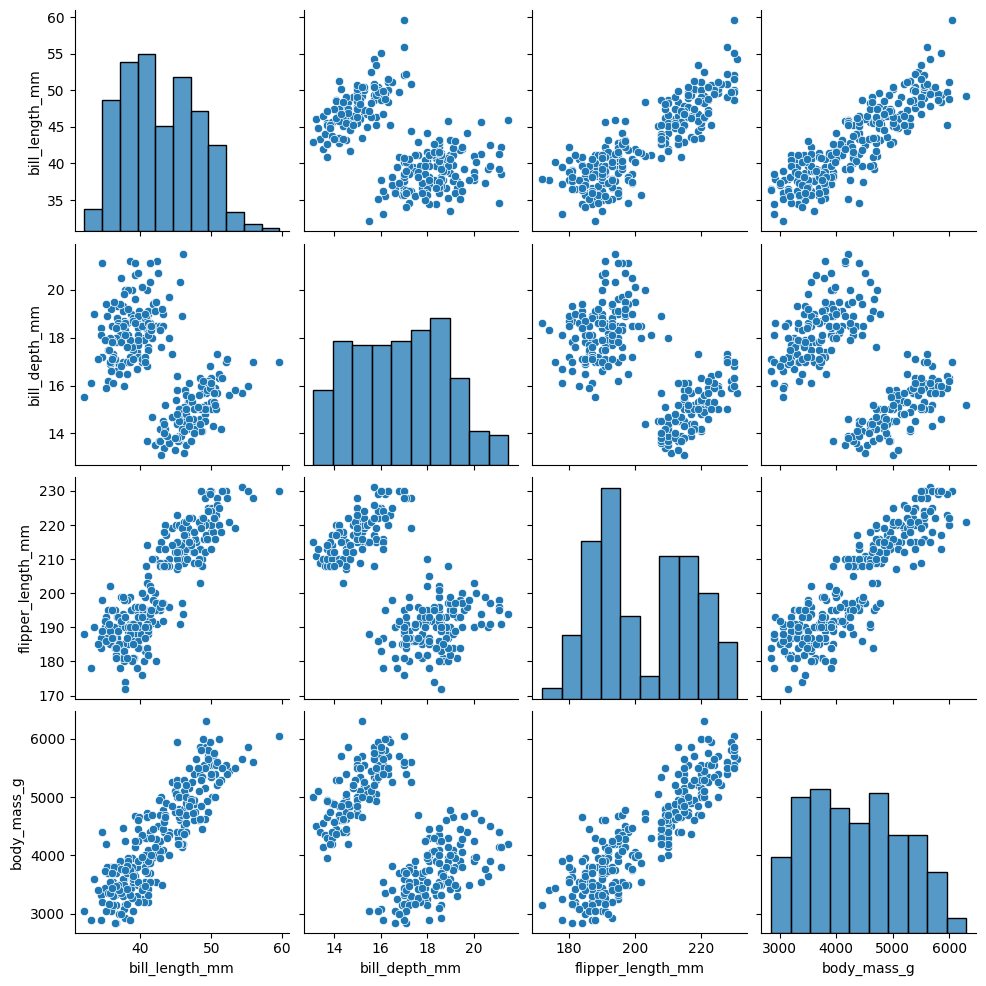

In [11]:
# Plot a scatter matrix from all the numerical columns
sns.pairplot(penguins_sub)

In [16]:
# Prepare the data for linear regression
ols_data = penguins_sub[["bill_length_mm", "body_mass_g"]]
ols_data.head()

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
4,36.7,3450.0
5,39.3,3650.0


In [18]:
# Import OLS function
from statsmodels.formula.api import ols

# The formula describes that body_mass_g (dependant) is related to bill_length_mm (independent)
ols_formula = "body_mass_g ~ bill_length_mm"

ols_estimator = ols(formula=ols_formula, data=ols_data)
ols_model = ols_estimator.fit()

In [19]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           1.33e-85
Time:                        21:05:54   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# b = -1707.2919
# m = 141.1904
# y = mx + b

# Get predictions from the model
x = ols_data.bill_length_mm
fitted_values = ols_model.predict(x)

# Calculate residuals
residuals = ols_model.resid

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

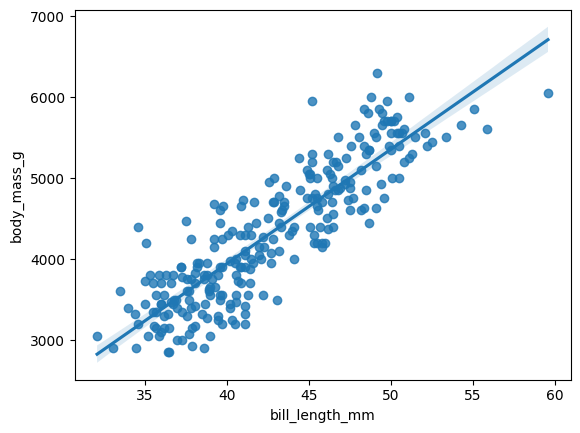

In [22]:
sns.regplot(x="bill_length_mm", y="body_mass_g", data=ols_data)

Text(0, 0.5, 'Residuals')

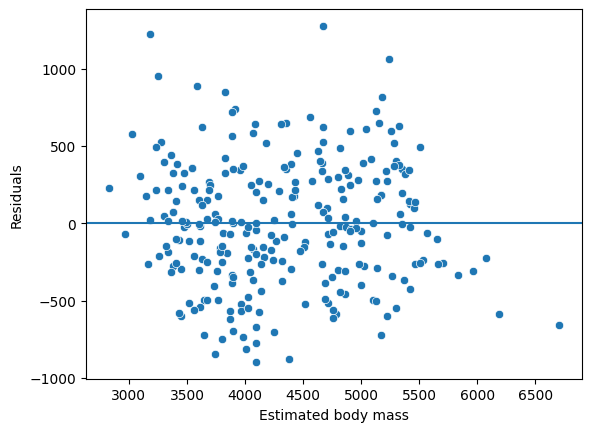

In [29]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Estimated body mass")
fig.set_ylabel("Residuals")

Text(0.5, 1.0, 'Histogram of Residuals')

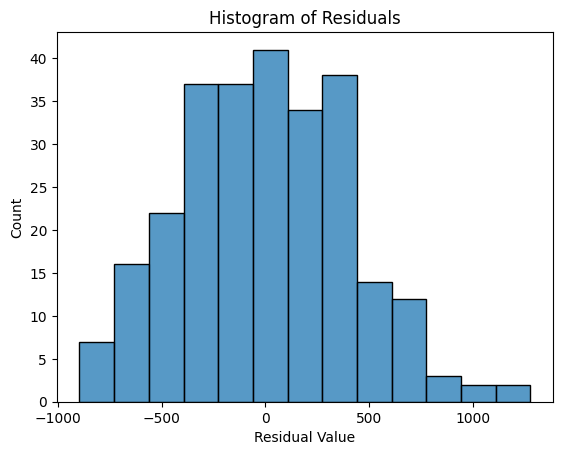

In [30]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")

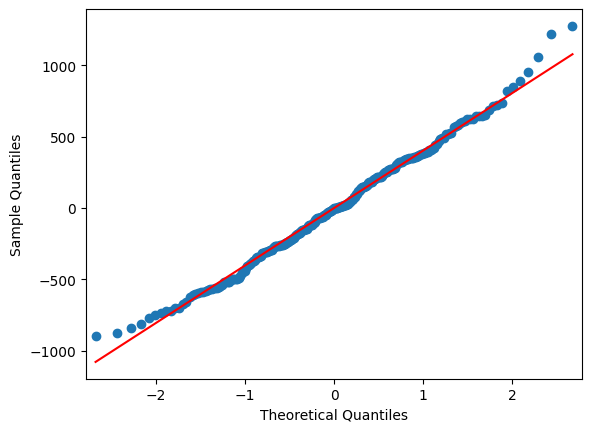

In [31]:
import statsmodels.api as sm

fig = sm.qqplot(residuals, line="s")